In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import seaborn as sns

In [2]:
clean_df = pd.read_csv('../data/processed/processed_data.csv')
clean_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Making questions:

**Question 1:** will the status of patient's life affect to the probability of stroke?

**Step 1:** we will consider the status of patient's marriage to ask: whether marriage status will influence strongly to the probability of stroke?

Text(0.5, 1.0, 'Marriage status & Probability of stroke')

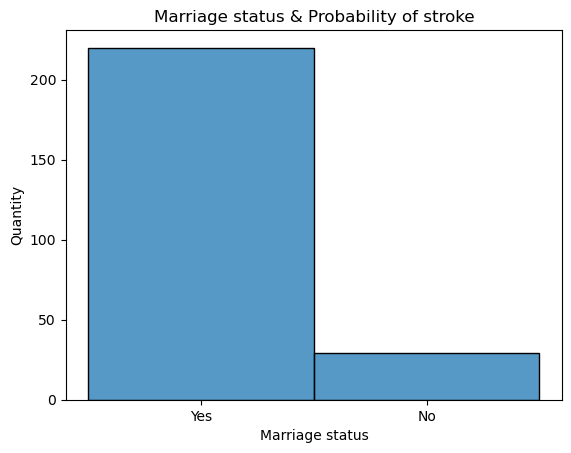

In [8]:
df_copy = clean_df[clean_df['stroke'] == 1]
sns.histplot(data=df_copy, x='ever_married')
plt.xlabel('Marriage status')
plt.ylabel('Quantity')
plt.title("Marriage status & Probability of stroke")

**Question 2:** 

**Answering this question will** help 

**How we can answer this question:**

**Question 3:** 

**Answering this question will** help 

**How we can answer this question:**